<a href="https://colab.research.google.com/github/hhshawks75/MachineLearning/blob/master/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 6 - INTRO TO MACHINE LEARNING | Support Vector Machine

> **FULL MARKS = 100**



**Note:** To submit the assignment, please follow the same steps as in assignments 1-5.

In this assignment we will use things we have learned from previous exercises. You will be given a code walk through about a new dataset and svm. You have to implement svm using scikit learn based on the given instructions. You also have to report different visualizations. This assignment will introduce you to a few of the libraries used for image manipulation as well. 

1. **Code Walk Through| SCORE : 10**
> 
  **1.1 SVM**
    
    In  this section you just need to walk through the code from Jupyter notebook that was presented in class. You don't have to do anything. But focus on the Application on Handwritten Letter Data classification. We will be doing a similar task, but a different dataset will be used.
    
    References
    > > https://git.txstate.edu/cs4347-spr2020/jupyter-notebooks/blob/master/09-svm.ipynb 

  **1.2 FASHION MNIST DATASET**

    You will be following along this notebook (and answer some questions based on your observations). We will provide you a code walkthrough to make you familiar with the FASHION MNIST dataset. You can learn more about this data from the reference.
      
    References
    
    > https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/

2. **SVM | SCORE : 75**
    
  **2.1 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using linear kernel**
      
  **2.2 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using polynomial (poly) kernel**

  **2.3 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial (RBF) kernel**

  **2.4 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial (RBF) with parameter tuning kernel**

  **2.5 Compare Accuracies between different kernel implementations. You need to plot different scores vs kernel ['linear','poly',.....] using a boxplot**


3. **Answer Following Question | SCORE : 15**
  
  **Answer a few questions based on your observations**
      


### 1. Code Walk Through
---



---



***EXERCISE NO. 1***

  > **Task-1 : SVM WALKTHROUGH | Score :12.5** 

In [ ]:
# List 3 important things you observed in code walk through from given reference.
"""
Answer goes here
1. When the C argument is small, then the margins will be wide and 
many support vectors will be on the margin or will violate the margin. 
When the  C argument is large, then the margins will be narrow and there will be few support vectors on the margin or violating the margin.

2. GridsearchCV() and clf.best_params_ can be used to find the best parameters 
    for the data classification

3. kernel can be changed to model linear, polynomial and other types of data 


"""
print()

***EXERCISE NO. 1***

  > **Task-2 :FASHION MNIST DATASET | Score :12.5** 

In [ ]:
# You are encouraged to research about fashion mnist dataset using the link in reference
# FashionvMNIST has 60,000 samples for training and around 10,000 samples for testing
# For the sake of this experiment we will not use entire dataset
# We will be using 10% of the dataset, that is around 6000 for training and 1000 for testing
# Run following cell to download data

In [ ]:
# Download data by running this script
!wget https://userweb.cs.txstate.edu/~k_b459/data.zip

--2020-04-10 04:24:10--  https://userweb.cs.txstate.edu/~k_b459/data.zip
Resolving userweb.cs.txstate.edu (userweb.cs.txstate.edu)... 147.26.231.163
Connecting to userweb.cs.txstate.edu (userweb.cs.txstate.edu)|147.26.231.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5627440 (5.4M) [application/zip]
Saving to: ‘data.zip.2’

data.zip.2          100%[===================>]   5.37M  12.0MB/s    in 0.4s    

2020-04-10 04:24:11 (12.0 MB/s) - ‘data.zip.2’ saved [5627440/5627440]



In [ ]:
# Unzip dataset
!unzip data.zip

Archive:  data.zip
replace y28train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: y28train.npy            
replace x8test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: x8test.npy              
replace y8test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: y8test.npy              
replace y8train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: y8train.npy             
replace x8train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: x8train.npy             
replace y28test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: y28test.npy             
replace x28test.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: x28test.npy             
replace x28train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: x28train.npy            


In [ ]:
# Lets see our data
ls

data.zip    data.zip.2    x28test.npy   x8test.npy   y28test.npy   y8test.npy
data.zip.1  sample_data/  x28train.npy  x8train.npy  y28train.npy  y8train.npy


In [ ]:
# Lets load the data
import numpy as np
x8train = np.load('x8train.npy')
y8train = np.load('y8train.npy')
x8test = np.load('x8test.npy')
y8test = np.load('y8test.npy')
x28train = np.load('x28train.npy')
y28train = np.load('y28train.npy')
x28test = np.load('x28test.npy')
y28test = np.load('y28test.npy')

In [ ]:
# We will use following helper function to visualize data
import matplotlib.pyplot as plt
# Plot image randomly in a grid
def gridify(x, n = 64, title = '',height = 10):
  """
  note n should be square integer
  note x should be [b,h,w,c]
  """
  mask = np.random.choice([False, True], len(x), p=[0.75, 0.25])
  h = int(n**0.5)
  grid = x[mask][:n]
  plt.figure(figsize = (height,height))
  plt.title(title)
  plt.imshow(np.transpose(grid.reshape(h,h,x.shape[1],x.shape[2],1),(0,2,1,3,4)).reshape(h*x.shape[1],h*x.shape[2]), cmap='gray',interpolation='nearest')

# Plot first n images classwise
def plotclasswise(X,Y, height = 10,n = 10):
  fig, ax = plt.subplots(10,1)
  fig.set_figheight(height)
  fig.set_figwidth(1*n)
  for i in range(10):  
    x = X[Y == i][:n]
    ax[i].imshow(np.transpose(x.reshape(1,height,x.shape[1],x.shape[2],1),(0,2,1,3,4)).reshape(1*x.shape[1],n*x.shape[2]), cmap='gray',interpolation='nearest')
    ax[i].set_ylabel(f'Class : {str(i).zfill(2)}')

In [ ]:
# lets see the shape of data
print(f'x8train shape = {x8train.shape}')
print(f'y8train shape = {y8train.shape}')
print(f'x8test shape = {x8test.shape}')
print(f'y8test shape = {y8test.shape}')
print(f'x28train shape = {x28train.shape}')
print(f'y28train shape = {y28train.shape}')
print(f'x28test shape = {x28test.shape}')
print(f'y28test shape = {y28test.shape}')

x8train shape = (5971, 8, 8)
y8train shape = (5971,)
x8test shape = (979, 8, 8)
y8test shape = (979,)
x28train shape = (5971, 28, 28)
y28train shape = (5971,)
x28test shape = (979, 28, 28)
y28test shape = (979,)


In [ ]:
# To understand the nature of our data, we will visualize them.
# x8train shape = (5971, 8, 8) represents following
# We have 5971 images with height=8 and width= 8 pixels, we have only one color channel (among RGB)
# So it is grayscale image

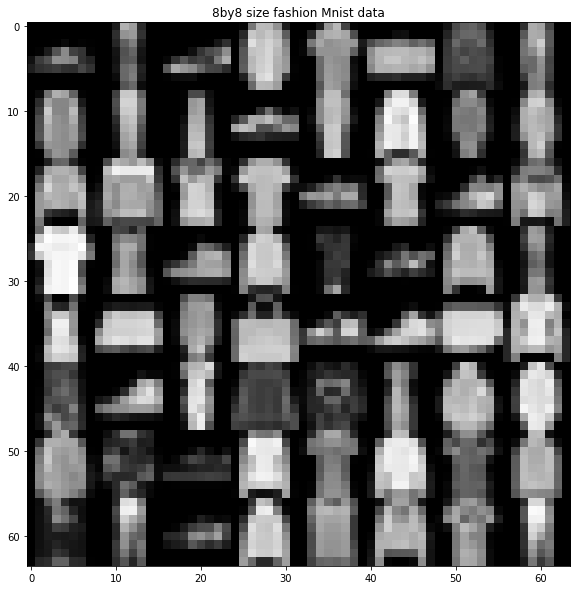

In [ ]:
# Lets see few random images from the 8by8 sized data training data
gridify(x8train, title='8by8 size fashion Mnist data')

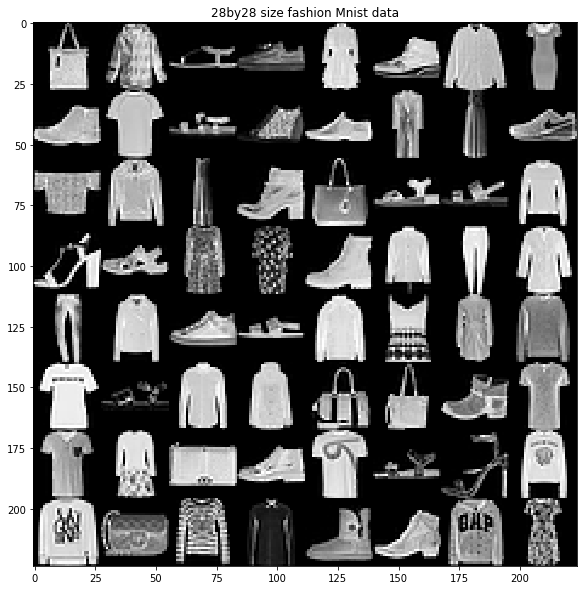

In [ ]:
# Lets see few random images from the 28by28 sized data training data
gridify(x28train, title='28by28 size fashion Mnist data')

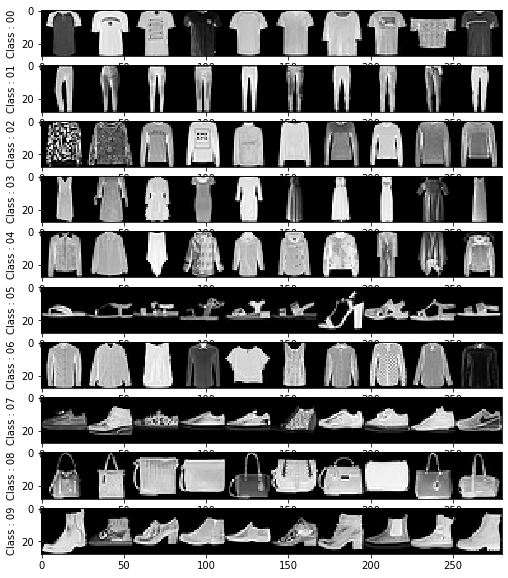

In [ ]:
# Lets visualize 28by28 size data classwise
plotclasswise(x28train, y28train)

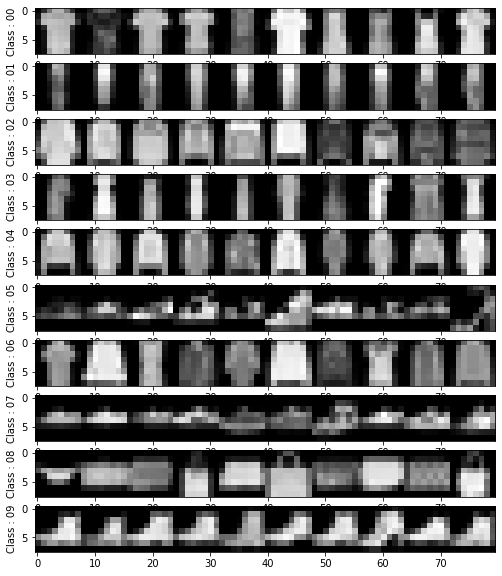

In [ ]:
# Lets visualize 8by8 size data classwise
plotclasswise(x8train, y8train)

In [ ]:
# You might have noticed that 8by8 images are way too blurry
# Due to decrease in resolution images lose a lot of information
# This will have an impact on our classifier in our experiments


In [ ]:
# Note before fitting these data to SVC you need to reshape the images x into vectors
# (x here are x8train,x28train,x8test,x28test)
# You can use following function for that
def reshapeandreturn(x):
  b = x.shape[0]
  x_ = x.reshape(b,-1)
  return x_

# You don't need to reshape y
# You will be using the following x's for fitting and predicting
x8train_ = reshapeandreturn(x8train)
x28train_ = reshapeandreturn(x28train)
x8test_ = reshapeandreturn(x8test)
x28test_ = reshapeandreturn(x28test)
print(x8train_.shape, x8train.shape)

(5971, 64) (5971, 8, 8)


In [ ]:
# As a part of code walkthrough you need to answer following one question.

# Why do you think we need to reshape the images?
"""
Answer goes here

The imported data needs to be reshaped to match the model it will fit.
Needs to have the correct number of feature vectors.






"""
print()

### 2. IMPLEMENT SVM CLASSIFICATION BY FOLLOWING THE EXAMPLES PROVIDED IN THE REFENCE GIVEN AS A WALK THROUGH
---



---



In [ ]:
from sklearn.svm import SVC

***EXERCISE NO. 2***

  > **Task-1 : 2.1 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using linear kernel | Score :5** 

In [ ]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               This sklearn example shows how that is done for the digits dataset
               https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

Requirement 3. Compare the results between above two experiments
"""

# For 8by8 data use following model 
linear_svc8 = SVC(kernel='linear')
# For 28by28 data use following model 
linear_svc28 = SVC(kernel='linear')

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       105
         1.0       0.94      0.92      0.93        98
         2.0       0.69      0.62      0.66        96
         3.0       0.73      0.79      0.76        92
         4.0       0.67      0.66      0.66        97
         5.0       0.95      0.89      0.92       101
         6.0       0.46      0.43      0.45        88
         7.0       0.89      0.90      0.90       100
         8.0       0.90      0.94      0.92       107
         9.0       0.87      0.92      0.89        95

    accuracy                           0.80       979
   macro avg       0.79      0.79      0.79       979
weigh

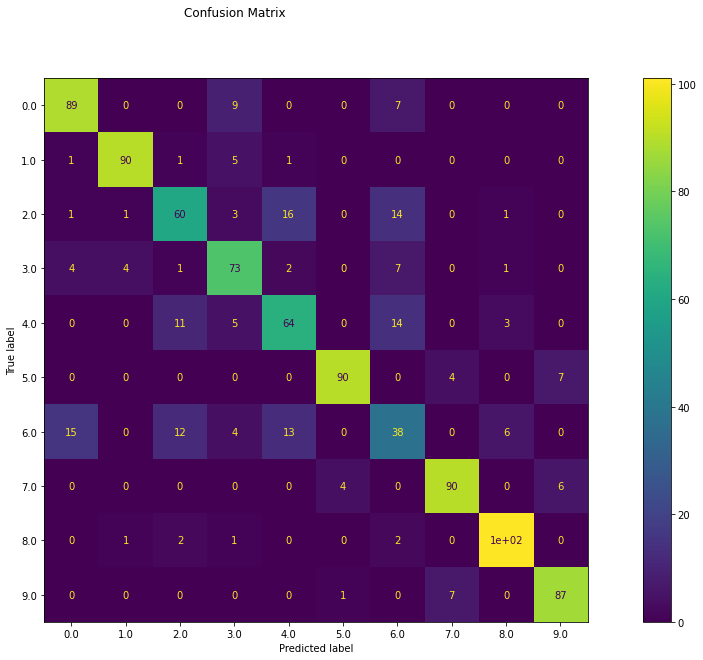

In [ ]:
# For 8by8 data use following model 
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               This sklearn example shows how that is done for the digits dataset
               https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task
"""

linear_svc8 = SVC(kernel='linear')

# _, axes = plt.subplots(2, 4)
# images_and_labels = list(zip(digits.images, digits.target))
# for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Training: %i' % label)

# # To apply a classifier on this data, we need to flatten the image, to
# # turn the data in a (samples, feature) matrix:
# n_samples = len(digits.images)
# data = digits.images.reshape((n_samples, -1))

import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# Create a classifier: a support vector classifier
classifier = linear_svc8

# # Split data into train and test subsets
# X_train, X_test, y_train, y_test = train_test_split(
#     data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
classifier.fit(x8train_,y8train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(x8test_)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y8test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       105
         1.0       0.97      0.96      0.96        98
         2.0       0.72      0.74      0.73        96
         3.0       0.81      0.76      0.79        92
         4.0       0.73      0.72      0.73        97
         5.0       0.94      0.90      0.92       101
         6.0       0.54      0.51      0.52        88
         7.0       0.88      0.89      0.89       100
         8.0       0.93      0.91      0.92       107
         9.0       0.92      0.95      0.93        95

    accuracy                           0.82       979
   macro avg       0.82      0.82      0.82       979
weigh

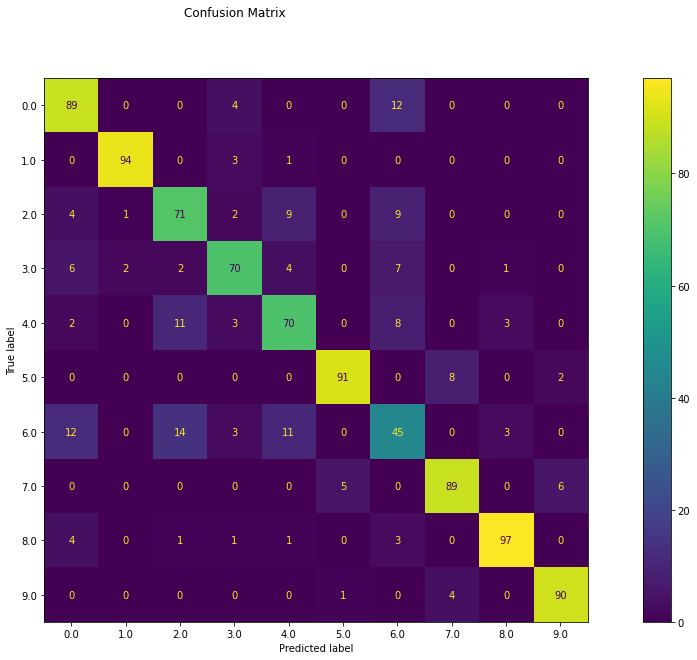

In [ ]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# For 28by28 data use following model 
linear_svc28 = SVC(kernel='linear')

# Create a classifier: a support vector classifier
classifier28 = linear_svc28

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
classifier28.fit(x28train_,y28train)

# Now predict the value of the digit on the second half:
predicted1 = classifier28.predict(x28test_)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier28, metrics.classification_report(y28test, predicted1)))
disp = metrics.plot_confusion_matrix(classifier28, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [ ]:
# Requirement 3. Compare the results between above two experiments
"""
The 8x8 data scored an accuracy of around 80%, and the 28x28 scored an accuracty around 82%
The accuracy was somewhat close in both models but approximately 20% error is less than
desired.

"""

'\nThe 8x8 data scored an accuracy of around 80%, and the 28x28 scored an accuracty around 82%\nThe accuracy was somewhat close in both models but approximately 20% error is less than\ndesired.\n\n'

***EXERCISE NO. 2***

  > **Task-2 : 2.2 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using polynomial (poly) kernel | Score :15** 

In [ ]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

Requirement 3. Compare the results between above two experiments
"""

# For 8by8 data use following model 
poly_svc8 = SVC(kernel='poly')
# For 28by28 data use following model 
poly_svc28 = SVC(kernel='poly')


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       105
         1.0       0.98      0.89      0.93        98
         2.0       0.76      0.59      0.67        96
         3.0       0.77      0.65      0.71        92
         4.0       0.71      0.63      0.67        97
         5.0       0.72      0.95      0.82       101
         6.0       0.40      0.53      0.46        88
         7.0       0.92      0.82      0.87       100
         8.0       0.94      0.94      0.94       107
         9.0       0.91      0.91      0.91        95

    accuracy                           0.78       979
   macro avg       0.79      0.77      0.77       979
weighte

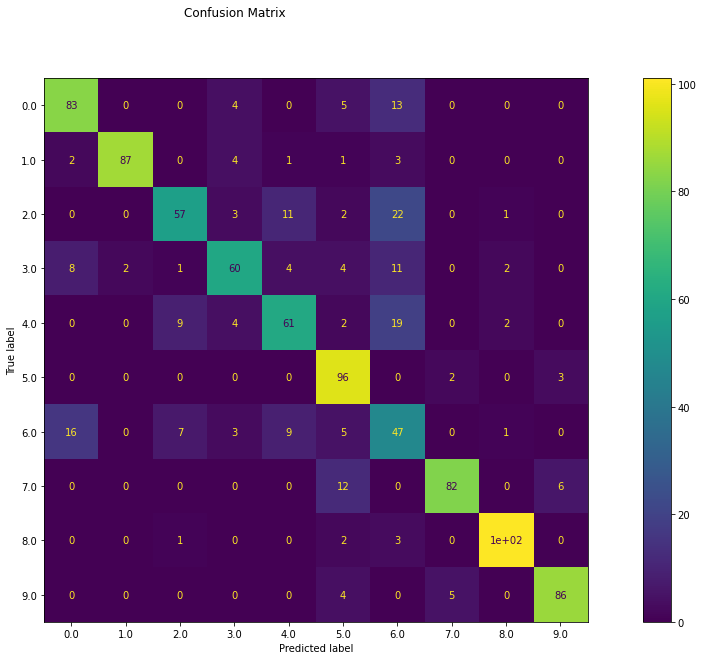

In [ ]:
# Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
#                You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task



# Create a classifier: a support vector classifier
poly8_classifier = poly_svc8

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
poly8_classifier.fit(x8train_,y8train)

# Now predict the value of the digit on the second half:
predicted_poly = poly8_classifier.predict(x8test_)


print("Classification report for classifier %s:\n%s\n"
      % (poly8_classifier, metrics.classification_report(y8test, predicted_poly)))
disp = metrics.plot_confusion_matrix(poly8_classifier, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       105
         1.0       1.00      0.93      0.96        98
         2.0       0.81      0.72      0.76        96
         3.0       0.83      0.67      0.74        92
         4.0       0.74      0.70      0.72        97
         5.0       0.69      0.94      0.79       101
         6.0       0.49      0.56      0.52        88
         7.0       0.93      0.85      0.89       100
         8.0       0.92      0.93      0.92       107
         9.0       0.93      0.93      0.93        95

    accuracy                           0.80       979
   macro avg       0.81      0.80      0.80       979
weighte

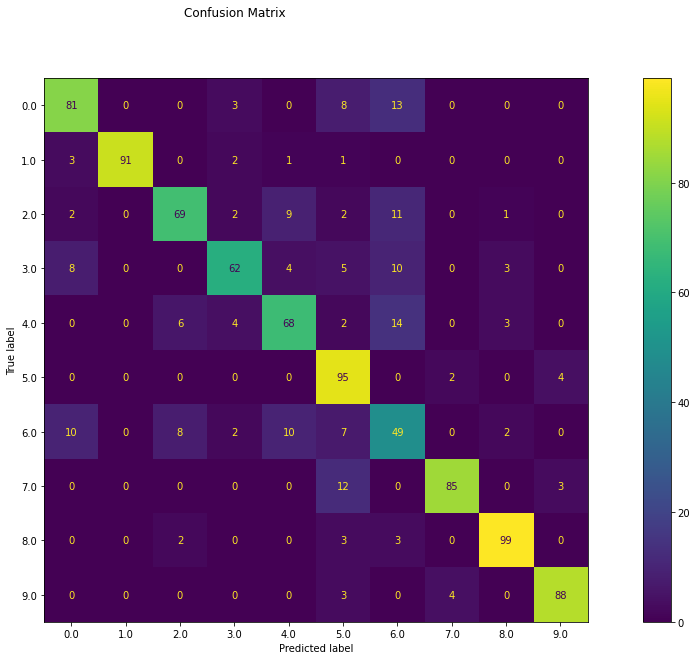

In [ ]:
# Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
#                You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task



# Create a classifier: a support vector classifier
classifier_poly28 = poly_svc28

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
classifier_poly28.fit(x28train_,y28train)

# Now predict the value of the digit on the second half:
predicted_poly28 = classifier_poly28.predict(x28test_)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier_poly28, metrics.classification_report(y28test, predicted_poly28)))
disp = metrics.plot_confusion_matrix(classifier_poly28, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [ ]:
# Requirement 3. Compare the results between above two experiments
"""Polysvc28 is slightly more accurate with an accuracy of 28 compared to the polysvc8
which has an accuracy of around 78%
Both are somewhat close but still far from 100%"""

'Polysvc28 is slightly more accurate with an accuracy of 28 compared to the polysvc8\nwhich has an accuracy of around 78%\nBoth are somewhat close but still far from 100%'

***EXERCISE NO. 2***

  > **Task-3 : 2.3 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial kernel (RBF)| Score :15** 

In [ ]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

Requirement 3. Compare the results between above two experiments
"""

# For 8by8 data use following model 
rbf_svc8 = SVC(kernel='rbf')
# For 28by28 data use following model 
rbf_svc28 = SVC(kernel='rbf')

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       105
         1.0       0.94      0.92      0.93        98
         2.0       0.69      0.66      0.67        96
         3.0       0.71      0.79      0.75        92
         4.0       0.70      0.66      0.68        97
         5.0       0.96      0.90      0.93       101
         6.0       0.50      0.49      0.49        88
         7.0       0.92      0.90      0.91       100
         8.0       0.92      0.96      0.94       107
         9.0       0.86      0.94      0.90        95

    accuracy                           0.81       979
   macro avg       0.80      0.81      0.80       979
weighted

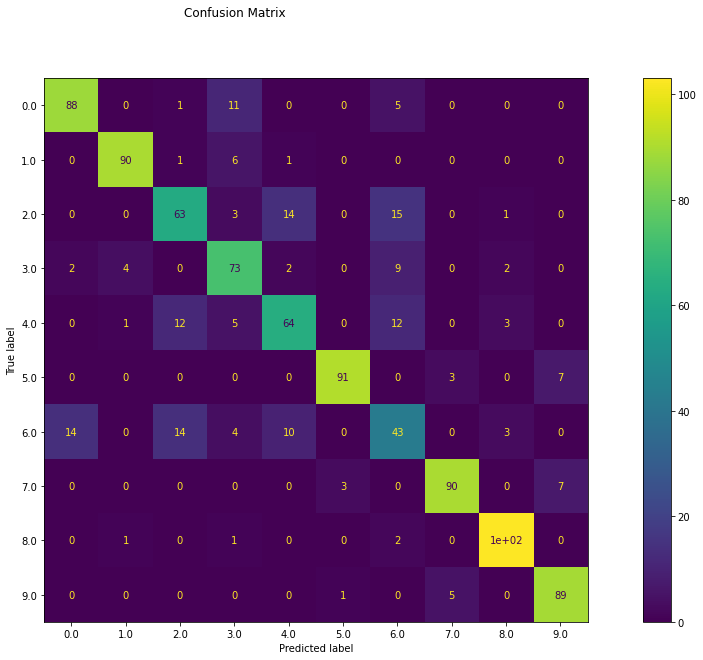

In [ ]:
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task
"""

# Create a classifier: a support vector classifier
rbf_8_classifier = rbf_svc8

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
rbf_8_classifier.fit(x8train_,y8train)

# Now predict the value of the digit on the second half:
predicted_rbf = rbf_8_classifier.predict(x8test_)


print("Classification report for classifier %s:\n%s\n"
      % (rbf_8_classifier, metrics.classification_report(y8test, predicted_rbf)))
disp = metrics.plot_confusion_matrix(rbf_8_classifier, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.99      0.94      0.96        98
         2.0       0.74      0.73      0.74        96
         3.0       0.77      0.82      0.79        92
         4.0       0.71      0.74      0.73        97
         5.0       0.95      0.93      0.94       101
         6.0       0.56      0.51      0.54        88
         7.0       0.92      0.89      0.90       100
         8.0       0.90      0.95      0.93       107
         9.0       0.89      0.94      0.91        95

    accuracy                           0.83       979
   macro avg       0.83      0.83      0.83       979
weighted

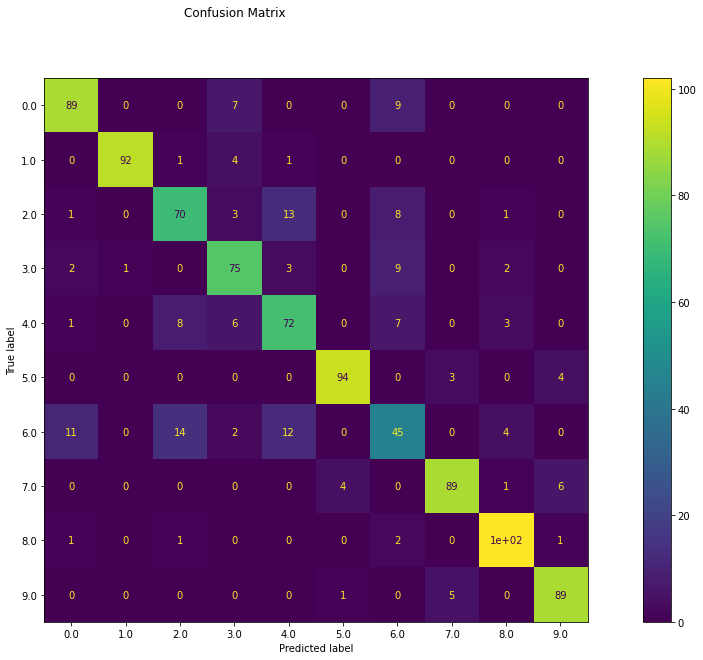

In [ ]:
"""
Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task
"""
# # For 28by28 data use following model 
# rbf_svc28 = SVC(kernel='rbf')
# Create a classifier: a support vector classifier
rbf_28_classifier = rbf_svc28


# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
rbf_28_classifier .fit(x28train_,y28train)

# Now predict the value of the digit on the second half:
predicted_rbf28 = rbf_28_classifier .predict(x28test_)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (rbf_28_classifier , metrics.classification_report(y28test, predicted_rbf28)))
disp = metrics.plot_confusion_matrix(rbf_28_classifier , x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [ ]:
"""
Requirement 3. Compare the results between above two experiments
"""

"""Both rbf classiiers for 8x8 abd 28xw28 pixels are showing an increase from the
previous models and once again the 28x28 with a score of 83% and the 8x8 with a score
of 81% are showing accuracies greater than the two previous models """

'Both rbf classiiers for 8x8 abd 28xw28 pixels are showing an increase from the\nprevious models and once again the 28x28 with a score of 83% and the 8x8 with a score\nof 81% are showing accuracies greater than the two previous models '

***EXERCISE NO. 2***

  > **Task-4 : 2.4 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial kernel (RBF) with GridSearch to find the best possible parameters values for "C" and "gamma" | Score :15** 

In [ ]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

Requirement 3. Compare the results between above two experiments
"""


tuned_parameters = [{'C': [0.01, 0.1, 1],
                     'gamma': [0.5, 1,2]}]

from sklearn.model_selection import GridSearchCV
# For 8by8 data use following model 
gridrbf_svc8 = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=2, scoring='accuracy')

# For 28by28 data use following model 
gridrbf_svc28 = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=2, scoring='accuracy', n_jobs=-1)

Classification report for classifier GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.5, 1, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0):
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       105
         1.0       0.94      0.94      0.94        98
         2.0       0.73      0.73      0.73        96
         3.0       0.75      0.78      0.77        92
         4.0       0.73

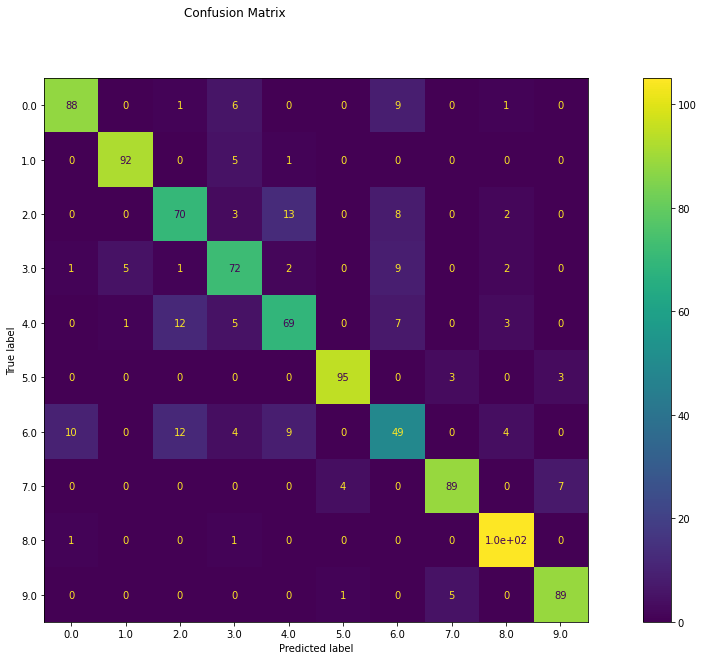

In [ ]:
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task
"""
# Create a classifier: a support vector classifier
gridrbf_8_classifier = gridrbf_svc8 

# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
gridrbf_8_classifier.fit(x8train_,y8train)

# Now predict the value of the digit on the second half:
predicted_gridrbf = gridrbf_8_classifier.predict(x8test_)


print("Classification report for classifier %s:\n%s\n"
      % (gridrbf_8_classifier , metrics.classification_report(y8test, predicted_gridrbf)))
disp = metrics.plot_confusion_matrix(gridrbf_8_classifier , x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.5, 1, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0):
              precision    recall  f1-score   support

         0.0       0.95      0.38      0.54       105
         1.0       1.00      0.51      0.68        98
         2.0       0.12      1.00      0.21        96
         3.0       1.00      0.01      0.02        92
         4.0       1.00  

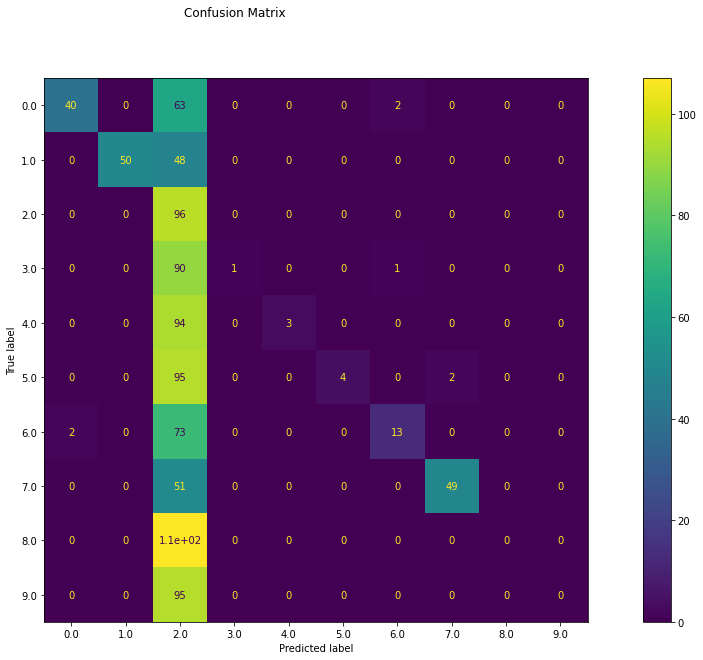

In [ ]:
"""

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

"""
# For 28by28 data use following model 
gridrbf_svc28 = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=2, scoring='accuracy', n_jobs=-1)

# Create a classifier: a support vector classifier
gridrbf28_classifier = gridrbf_svc28


# We learn the digits on the first half of the digits
# x8train,y8train,x8test,y8test,x8train_,x8test_
gridrbf28_classifier.fit(x28train_,y28train)

# Now predict the value of the digit on the second half:
grid_predicted_rbf28 = gridrbf28_classifier.predict(x28test_)

# images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
# for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
#     ax.set_axis_off()
#     ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
#     ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (gridrbf28_classifier, metrics.classification_report(y28test, grid_predicted_rbf28)))
disp = metrics.plot_confusion_matrix(gridrbf28_classifier, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

In [ ]:
"""

Requirement 3. Compare the results between above two experiments
The radial kernel with gridsearch for the 28x28 took very long and was only 26% accurate, proving to be not as good as the results obtained in the 8x8 model which did not take nearly as long to compute.
"""

'\n\nRequirement 3. Compare the results between above two experiments\n'

***EXERCISE NO. 2***

  > **Task-5 : 2.5 Plot a Boxplot comparing the accuracy of the methods that we examined above (i.e. SVM with linear kernel, poly kernel, RBF kernel) using default parameter values, on the 28-by-28 dataset. | Score :15** 

In [ ]:
# The following examples show how to plot a boxplot comparing the accuracy of 
# different algorithms.
# https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
# https://pythondata.com/comparing-machine-learning-methods/
#
# NOTE: for this experiment, instead of using the x28test_ for predictions,
# perfrom a cross validation using cross_val_score on the (x28train_, y28train),
# as shown in the examples in the references.
#
# You can use as many cells as needed 

linear_svc28| Mean=0.821970 STD=0.014636
poly_svc| Mean=0.801872 STD=0.016195
rbf_svc| Mean=0.844747 STD=0.014381


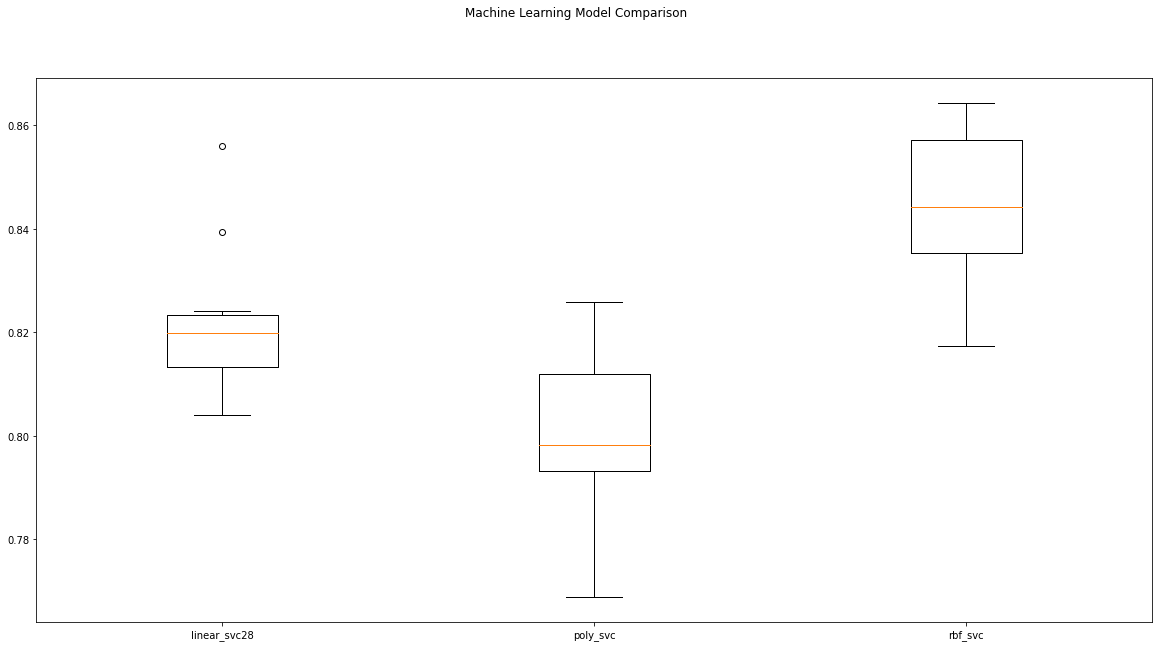

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# ('RBF', gridrbf_svc28), 
random_seed = 12
outcome = []
model_names = []
models = [('linear_svc28', linear_svc28),
          ('poly_svc',poly_svc28),
          ('rbf_svc', rbf_svc28)]
           


for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10)
    results = model_selection.cross_val_score(model, x28train_, y28train, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)


fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()

### 3. Answer the Following Questions
---



---



***EXERCISE NO. 3***

  > **Answer Following | Score :15** 

In [ ]:
# 3.1 What are 3 major things you observed from above experiments?
"""
Answer Goes Here
1. rbf_svc produces more accuracy than the other two models
2. Poly svc has the greatest standard deviation than the other two methods.
3. Radial kernel with gridsearch requires long computational time.

"""

# 3.2 You should have noticed that we use only used 10% of the FASHION MNIST dataset. Why do you think didn't we use entire dataset?
"""
Answer Goes Here
We want to produce a model that can predict future data and not the entire dataset only that is already given. We want it to be useable in the future.

"""

# 3.3 SVMs used to be very popular few years back, but they have lost their popularity. 
# Why do you think that happended? What are some of the limitations of SVMs comparted other machine learning algorithms we have seen?
"""
Answer Goes Here
They are not very accurate according to the above experiments giving accuracy scores.Support vector machines
need ready real valued vectors as features which can be a difficult task to produce.


"""
print()